# Machine Learning with SKLearn and Python

Once we have gotten ourselves acquainted with python and use of Pandas to work we data we are ready to work with a few of the libraries in Python to make predictions.

In Machine learning we will be looking at Supervised and unsupervised models as well as Regressors and Classifyers.

For Regressors there are the following methods avaliable:

* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* KNN
* Decision Tree's
* Random Forest
* SVM

For the Classifiers we will look at:

* Logistic Regression
* KNN
* Decision Trees
* Random Forest
* SVM
* Kernel SVM
* Naive Bayes

For all of the methods that we will be looking at we will need to load in a relevant data set and also import the correct classifier to make the prediction and fit the data.

## Regression vs Classification

The best way to think about the differences is the final outcome. With a Regressor we have a numerical value that we are trying to predict so the values could be anything between a maximum and a minimum value (For instance price or Mark Achieved), with Classification we are predicting a categorical varaible (So a variable in which you have to fit one of multiple predescribed classes (Gender or age group for instance).

# Regressors:
## Simple linear Regression

Simple linear regression is the most simple form of a regression model, this model we are predicting our dependend variable $Y$ with only a single independent variable $X$.

If we were to look at the overall function we are fitting we have the following $y=b_0 + b_1x_1$. 

In this example we have data on the salary of an employee and their years of experience. We will be using this information to see if we can predict the Salary they should Achieve.


The first part is the import of the data to use it:

In [1]:
import pandas as pd

dataset = pd.read_csv('data\\Salary_Data.csv')
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

As we only have $n=30$ we will not split the sample into a train and test set.  

now that we have the dataset imported we can import the regresor and make our first prediction model:

In [2]:
from sklearn.linear_model import LinearRegression
slregressor = LinearRegression()
slregressor.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We have now fitted the model.

All of the information relating to the fitted model is contained in the instance we have created of the LinearRegression object.

Let's have a look at some of the variables we can obtain from this fitted model:

In [3]:
print("Intercept: " + str(slregressor.intercept_))
print("Coefficient: " + str(slregressor.coef_))

Intercept: 25792.20019866871
Coefficient: [9449.96232146]


This is certainly not the output that most people are used to as we are not getting a single output will all of the details we need but rather we need to call up the individual items we require. This may not be what we are expecting but we will be looking at a different library later that will provide similar output to what we are used to.

Now that we have fitted the model let's start by running some predictions using the model:

In [4]:
slregressor.predict([[6.5]])

array([87216.95528813])

We can now say that a person with 6.5 years worth of experience should be earning a salary of 87 217. But we may not always want to predict a single item, so let's plot the line we have fitted to the data:

Text(0.5, 1.0, 'Expected Salary based on years of experience')

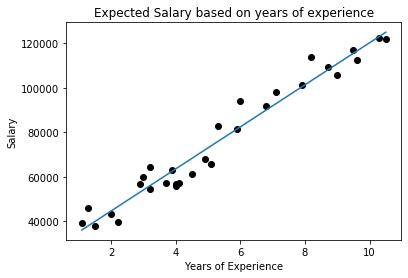

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x,y,color='black')
plt.plot(x,slregressor.predict(x.reshape(-1,1)))
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Expected Salary based on years of experience")

This was simple enough and we can see the overall graph that was fitted. But we won't always have just one independent variable and will need to look at an example with more independents.

## Multiple Linear Regression

This method is very similar to the simple Linear Regression where we are fitting a straight line to the data however the big difference is the number of independent varables that we have in the model to predict the data, so the function now looks like this:

 - $Y=b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n$
 
 In our example for Multiple linear regression we will be predicting the profit of a company based on R & D Spend, Administration, Marketing Spend and the state.
 
 We will need to do a bit of data clean up as we can't insert text into the model for prediction (So will need to create dummy variables.
 

In [11]:
dataset=pd.read_csv('data\\50_Startups.csv')

y = dataset.iloc[:,4]
x = dataset.iloc[:,:3]
x_dummy = pd.get_dummies(dataset.iloc[:,3])
x = x.join(x_dummy.iloc[:,:-1],how='right')

,R&D Spend,Administration,Marketing Spend,California,Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1
5,131876.90,99814.71,362861.36,0,0
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,1
8,120542.52,148718.95,311613.29,0,0
9,123334.88,108679.17,304981.62,1,0


Now we have a new function that we can use, **get_dummies** from **pandas**, this will take any text columns and create the dummy variables from the text. We must also just remember to remove one of the dummies as we run the model with $n-1$ dummies if they are exclusive.

Let's now fit the model, we will be using the same created instance as the simple linear regression:

In [15]:
slregressor.fit(x,y)

print('Intercept: ' +str(slregressor.intercept_))
print('Coefficients: '+str(slregressor.coef_))

Intercept: 50083.45681250342
Coefficients: [ 8.06023114e-01 -2.70043196e-02  2.69798610e-02  4.18870191e+01
  2.40675812e+02]


The only problem with this is we can't use a forward or backward method to see which variables to include or exclude as we don't have the p-values.

So we will now have a look at a different library (Which was mentioned earlier that will show us a lot more information).

In [30]:
import statsmodels.api as sm

reg2 = sm.OLS(endog=y,exog=x)

reg2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              735.7
Date:                Tue, 25 Feb 2020   Prob (F-statistic):                    6.07e-42
Time:                        23:35:48   Log-Likelihood:                         -544.86
No. Observations:                  50   AIC:                                      1100.
Df Residuals:                      45   BIC:                                      1109.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7308      0.066     11.072      0.000       0.598       0.864
Administration      0.3021      0.037      8.174      0.000       0.228       0.377
Marketing Spend     0.0776      0.023      3.397      0.001       0.032       0.124
California       6019.9282   4596.090      1.310      0.197   -3237.072    1.53e+04
Florida          3814.3461   4819.854      0.791      0.433   -5893.338    1.35e+04
==============================================================================
Omnibus:                        0.012   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.071
Skew:                          -0.015   Prob(JB):                        0.965
Kurtosis:                       2.817   Cond. No.                     8.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now this look more like the variables we are used to to with all of the measures and the P-values for the coefficients to make decisions around which of the variables should be included and removed.

From this point we can keep reruning the models until we have removed all of the variables that are not significant in the overall model.

## Polynomial regression 